In [356]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [357]:
conn = sqlite3.connect(r'C:\Users\Islam\.spyder-py3\ChelsesVsWesthamShots.sqlite')
cursor = conn.cursor()
cursor.execute('SELECT * FROM Shots')
data = cursor.fetchall()

In [358]:
headers= ["shotId","playerId","name","isHome","position","shotType","situation","xg","bodyPart","time","addedTime",
          "startx","starty","endx","endy","blockx","blocky","goalx","goaly"]
df = pd.DataFrame(data,columns=headers)
df

,shotId,playerId,name,isHome,position,shotType,situation,xg,bodyPart,time,addedTime,startx,starty,endx,endy,blockx,blocky,goalx,goaly
0,2156605,974505,Enzo Fernández,0,M,miss,assisted,0.028626,right-foot,2,0,61.4,21.9,60.8,0.0,60.8,15.5,60.8,90.3
1,2156621,552884,Jarrod Bowen,1,M,save,corner,0.366907,left-foot,5,0,47.8,2.7,49.0,0.0,47.3,1.0,49.0,84.8
2,2156628,877102,Nayef Aguerd,1,D,goal,corner,0.126847,head,7,0,45.8,5.6,45.5,0.0,0.0,0.0,45.5,85.4
3,2156666,47772,Michail Antonio,1,F,block,assisted,0.142592,left-foot,13,0,54.6,14.0,49.8,0.0,53.4,10.6,49.8,81.0
4,2156670,1085381,Nicolas Jackson,0,F,miss,set-piece,0.692233,head,14,0,50.3,3.1,50.6,0.0,0.0,0.0,50.6,26.4
5,2156698,354808,Saïd Benrahma,1,F,block,assisted,0.019569,right-foot,17,0,26.8,21.1,48.1,0.0,30.9,17.1,48.1,81.0
6,2156708,33541,Thiago Silva,0,D,block,corner,0.038968,head,20,0,57.5,7.8,52.8,0.0,56.7,6.4,52.8,81.0
7,2156713,904970,Conor Gallagher,0,M,save,assisted,0.029727,right-foot,21,0,65.2,25.9,49.0,0.0,52.7,1.9,49.0,79.1
8,2156717,1085381,Nicolas Jackson,0,F,miss,regular,0.093443,right-foot,22,0,49.3,14.5,53.3,0.0,0.0,0.0,53.3,13.9
9,2156726,802695,Ben Chilwell,0,M,miss,assisted,0.109000,head,24,0,46.0,7.3,36.1,0.0,0.0,0.0,36.1,86.1


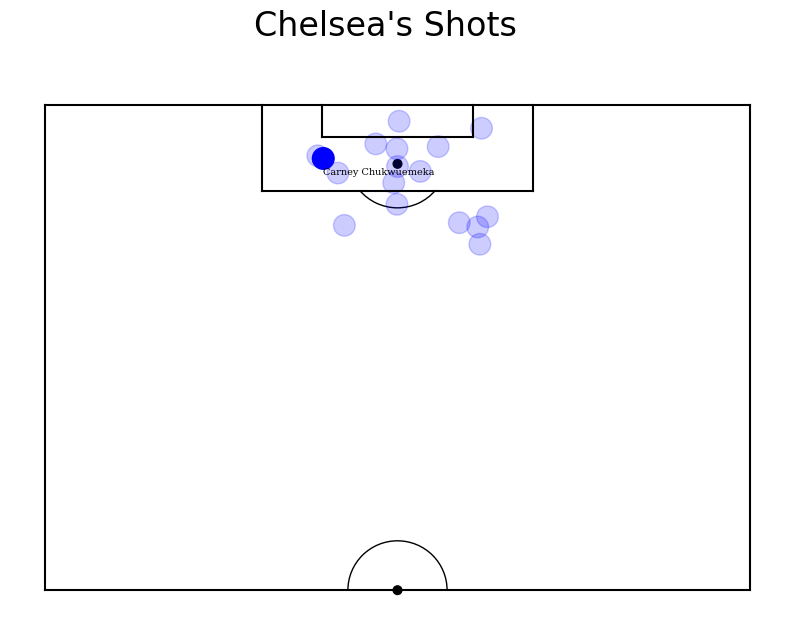

In [359]:

def createPitch(team,home,teamColor):
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 7,
        }
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
   

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    

    
    #Upper Penalty Area
    plt.plot([40,40],[0,16],color="black")
    plt.plot([40,90],[16,16],color="black")
    plt.plot([90,90],[16,0],color="black")
    
    
    #UPPER 6-yard Box
    plt.plot([51,79],[6,6],color="black")
    plt.plot([51,51],[0,6],color="black")
    plt.plot([79,79],[0,6],color="black")
    
    #Prepare Circles
    centreSpot = plt.Circle((65,90),0.8,color="black")
    upperPenSpot = plt.Circle((65,11),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreSpot)
    ax.add_patch(upperPenSpot)
    
    #Prepare Arcs
    rightArc = Arc((65,10),height=18.3,width=18.3,angle=270,theta1=130,theta2=230,color="black")
    cenArc=Arc((65,90),height=18.3,width=18.3,angle=180,theta1=0,theta2=180,color="black")
    #Draw Arcs
    ax.add_patch(rightArc)
    ax.add_patch(cenArc)
    
    #Tidy Axes
    plt.axis('off')
    plt.gca().invert_yaxis()
    


    for i, shot in df.iterrows():
        if shot["isHome"]==home:
            x= shot["startx"]+15
            y= shot["starty"]
            shotCircle=plt.Circle((x,y),2,color=teamColor)
            
            if shot["shotType"]=="goal":
                shotCircle.set_alpha(1)
                plt.text(x, y+3, f'{shot["name"]}', fontdict=font)
               
            else:
                 shotCircle.set_alpha(.2)
        else:
            continue
        
       
        ax.add_patch(shotCircle)
    
    fig.suptitle(f"{team}'s Shots", fontsize = 24)
    fig.set_size_inches(10, 7)
    #Display Pitch
    plt.show()

createPitch("Chelsea",0,"blue")